### *Note that all figures are plotted here except figure 2, which must be created in R

In [2]:
import glob 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from SA_convo_analysis_functions import get_individual_ec, get_ec_matrix, get_ec_events, compute_erp_synchrony
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from scipy.stats import sem


In [3]:
base_directory = '/Users/sophie/Dropbox/EyeContactinConversation'

### Figure 1. Logistic Regression Permutation

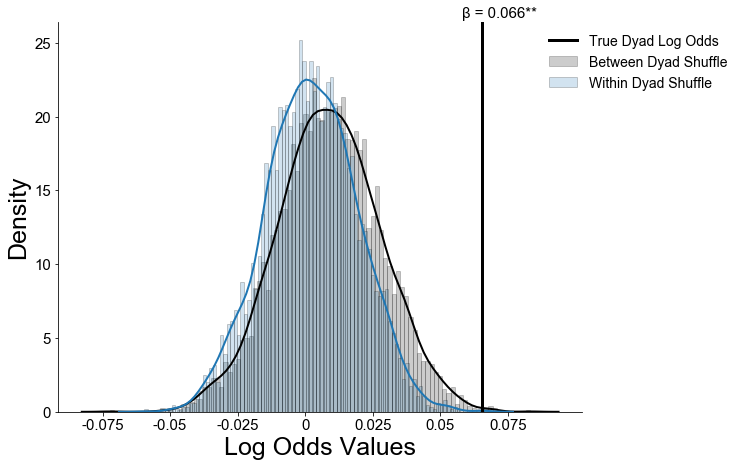

In [4]:
ec_dir = '{0}/Analyses'.format(base_directory)
#our two null distributions
bwsub_pseudo_ests = pd.read_csv('{0}/SA_pseudo_ests_betweenSubLogReg.csv'.format(ec_dir))
winsub_pseudo_ests = pd.read_csv('{0}/SA_pseudo_ests_withinSubLogReg.csv'.format(ec_dir))
#our true estimate
true_est = 0.06556

#some figure params
fig,ax=plt.subplots(figsize=(8,6))
sns.despine()
sns.set_context('paper')
plt.tight_layout()
font = {'fontname':'Arial'}

#plot between subjects null distribution
sns.distplot(bwsub_pseudo_ests['pseudo_ests'],color='black',
             hist_kws=dict(color='k',alpha=0.2,edgecolor='k',linewidth=1),
             kde_kws=dict(linewidth=2),bins=100,label='Between Dyad Shuffle')
#plot within subjects null distribution
sns.distplot(winsub_pseudo_ests['pseudo_ests'],
             hist_kws=dict(alpha=0.2,edgecolor='k',linewidth=1),
             kde_kws=dict(linewidth=2),bins=100,label='Within Dyad Shuffle')
#set axis values and labels
ax.set_xticks([-0.075,-0.05,-0.025,0,0.025,0.05,0.075])
ax.set_xticklabels(('-0.075','-0.05','-0.025','0','0.025','0.05','0.075'),**font,size=15)
ax.set_yticks([0,5,10,15,20,25])
ax.set_yticklabels(('0','5','10','15','20','25'),**font,size=15)
ax.set_xlabel('Log Odds Values',**font,size=25)
ax.set_ylabel('Density',**font,size=25)
#draw a line where our true estimate falls
ax.axvline(true_est,color='black',linewidth=3, label = 'True Dyad Log Odds')
ax.text(0.058,26.7,'\u03B2 = 0.066**',**font,size=15)
#make a legend
ax.legend(prop={'family':'Arial', 'size':14},frameon=False,
             loc=0,bbox_to_anchor=(0.65, 0.5, 0.65, 0.5))


### Figure 3. Average synchrony around an instance of eye contact

In [5]:
#get mutual eye contact matrix
ec_dir = '{0}/Analyses/eye_contact/mutual'.format(base_directory)
ecmutualfiles = glob.glob('{0}/*_ecCorrespond.txt'.format(ec_dir))
ec_matrix = get_ec_matrix(ecmutualfiles,datalen=600000)

#get eye contact onsets and offsets
ec_all, none_all = get_ec_events(ec_matrix)

#read in pre-computed synchrony matrix (for speed -- to re-create, run SA_DTW_timeseries.py)
dtw_dir = '{0}/Analyses'.format(base_directory)
dtw_long = pd.read_csv('{0}/dyad_dtw_timeseries.csv'.format(dtw_dir))
dtw_matrix = np.reshape(np.array(dtw_long['dtw']),(47,600))

#extract synchrony around eye contact onsets and offsets
dyads = np.arange(0,46)
onset, offset = compute_erp_synchrony(dtw_matrix,ec_all,none_all,dyads)

/Users/sophie/Dropbox (Dartmouth College)/SA_Scripts/SA_convo_preprocessing_functions.py:43: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.vstack( a[i:i+(winsize):1] for i in range(0,width,int(winsize*stepsize)))


Text(-5, 0.7, 'B')

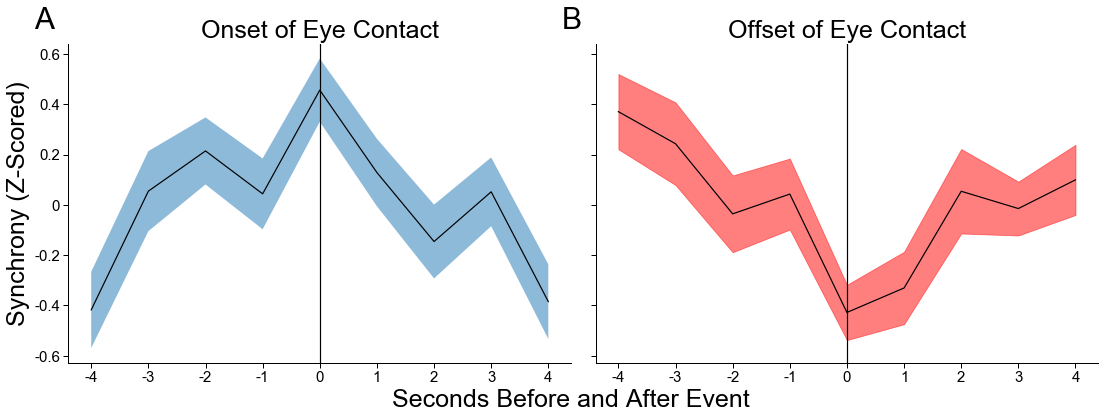

In [4]:
#make an x value to represent time
before = 4
after = 4
x = np.arange(-before,after+1,1)

#compute standard error of the mean for plots
sem_onset = sem(onset,nan_policy='omit')
sem_offset = sem(offset,nan_policy='omit')

#figure params
fig,ax=plt.subplots(1,2,figsize=(15,5),sharex =True, sharey=True)
sns.despine()
sns.set_context('paper')
plt.tight_layout()
font = {'fontname':'Arial'}

#plot the average synchrony around the onset of eye contact
ax[0].plot(x,np.nanmean(onset,axis=0),color = 'k')
f1 = ax[0].fill_between(x,np.nanmean(onset,axis=0)-sem_onset,
                        np.nanmean(onset,axis=0)+sem_onset,alpha =0.5)
#plot the average synchrony around the offset of eye contact
ax[1].plot(x,np.nanmean(offset,axis=0),color = 'k')
f2 = ax[1].fill_between(x,np.nanmean(offset,axis=0)-sem_offset,
                        np.nanmean(offset,axis=0)+sem_offset,alpha = 0.5,color='red')
#set axis values and labels
ax[0].set_xlabel("Seconds Before and After Event",**font,size = 25,position=(1,-.1))
ax[0].set_ylabel("Synchrony (Z-Scored)",**font,size = 25)
ax[0].set_xticks([-4,-3,-2,-1,0,1,2,3,4])
ax[0].set_xticklabels(('-4','-3','-2','-1','0','1','2','3','4'),**font,size=15)
ax[1].set_xticks([-4,-3,-2,-1,0,1,2,3,4])
ax[1].set_xticklabels(('-4','-3','-2','-1','0','1','2','3','4'),**font,size=15)
ax[0].set_yticks([-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6])
ax[0].set_yticklabels(('-0.6','-0.4','-0.2','0','0.2','0.4','0.6'),**font,size=15)
#draw vertical lines to represent onset and offset
ax[0].axvline(color='black')
ax[1].axvline(color='black')
#set titles
ax[0].set_title('Onset of Eye Contact',**font,position=(0.5,2),size = 25)
ax[1].set_title('Offset of Eye Contact',**font,position=(0.5,2),size = 25)
#draw A and B
ax[0].text(-5,0.7,'A',**font,size=30)
ax[1].text(-5,0.7,'B',**font,size=30)


### Figure 4. ERP permutations

Text(-0.25, 0.75, 'B')

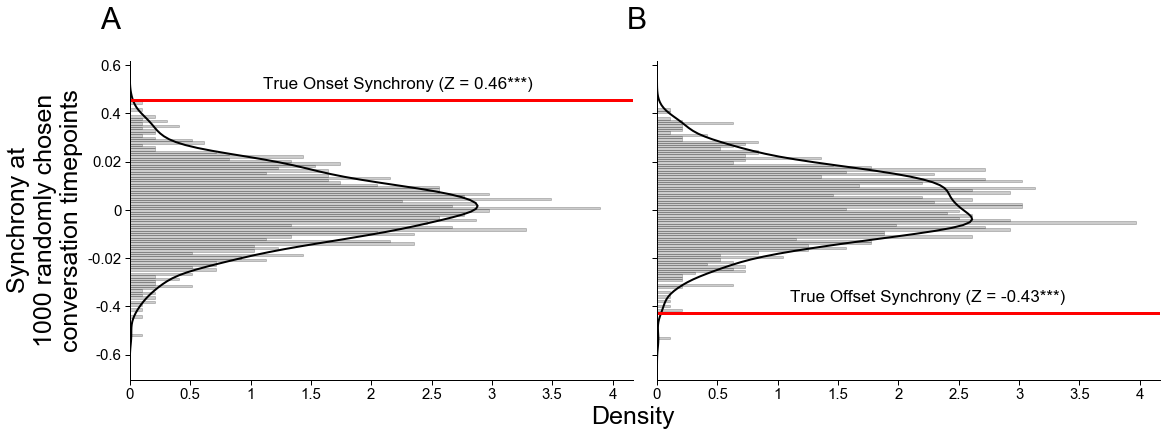

In [6]:
#get the true values from figure 3
true_onsync = np.nanmean(onset,axis=0)[4]
true_offsync = np.nanmean(offset,axis=0)[4]

#read in pseudo values (gotten from running SA_ERP_permutations.py)
erp_dir = '{0}/Analyses'.format(base_directory)
pseudo_ons_offs = pd.read_csv('{0}/SA_pseudo_ests_ERPana.csv'.format(erp_dir))

#figure params
fig,ax=fig,ax=plt.subplots(1,2,figsize=(15,5),sharex =True, sharey=True)
sns.despine()
sns.set_context('paper')
plt.tight_layout()
font = {'fontname':'Arial'}

sns.distplot(pseudo_ons_offs['pseudo_onset'],color='black',
             hist_kws=dict(color='k',alpha=0.2,edgecolor='k',linewidth=1),
             kde_kws=dict(linewidth=2),bins=100,ax=ax[0],vertical=True)
sns.distplot(pseudo_ons_offs['pseudo_offset'],color='black',
             hist_kws=dict(color='k',alpha=0.2,edgecolor='k',linewidth=1),
             kde_kws=dict(linewidth=2),bins=100,ax=ax[1],vertical=True)
ax[0].set_yticks([-0.6,-0.4,-0.2,0,0.2,0.4,0.6])
ax[0].set_yticklabels(('-0.6','-0.4','-0.02','0','0.02','0.4','0.6'),**font,size=15)
ax[1].set_yticks([-0.6,-0.4,-0.2,0,0.2,0.4,0.6])
ax[1].set_yticklabels(('-0.6','-0.4','-0.02','0','0.02','0.4','0.6'),**font,size=15)
ax[0].set_xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4])
ax[0].set_xticklabels(('0','0.5','1','1.5','2','2.5','3','3.5','4'),**font,size=15)
ax[1].set_xticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4])
ax[1].set_xticklabels(('0','0.5','1','1.5','2','2.5','3','3.5','4'),**font,size=15)
ax[0].set_ylabel('Synchrony at\n1000 randomly chosen\nconversation timepoints',**font,size=25)
ax[1].set_ylabel('',**font,size=25)
ax[0].set_xlabel('Density',**font,size=25,position=(1,-.1))
ax[0].axhline(true_onsync,color='red',linewidth=3)
ax[0].text(1.1,0.5,'True Onset Synchrony (Z = 0.46***)',**font,size=17)
ax[1].axhline(true_offsync,color='red',linewidth=3)
ax[1].text(1.1,-0.38,'True Offset Synchrony (Z = -0.43***)',**font,size=17)
ax[0].text(-0.25,0.75,'A',**font,size=30)
ax[1].text(-0.25,0.75,'B',**font,size=30)


### Figure 5. Finding mutual eye contact

In [7]:
#get individual eye contact matrix
indec_dir = '{0}/Analyses/eye_contact/individual'.format(base_directory)
indec_files = glob.glob('{0}/*_*_ecTimeseries.txt'.format(indec_dir))
indec_matrix = get_individual_ec(indec_files,datalen=6000)

#get mutual eye contact matrix
ec_dir = '{0}/Analyses/eye_contact/mutual'.format(base_directory)
ecmutualfiles = glob.glob('{0}/*_ecCorrespond.txt'.format(ec_dir))
ec_matrix = get_ec_matrix(ecmutualfiles,datalen=6000)

/Users/sophie/Dropbox (Dartmouth College)/SA_Scripts/SA_convo_preprocessing_functions.py:43: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.vstack( a[i:i+(winsize):1] for i in range(0,width,int(winsize*stepsize)))


In [7]:
#we choose a single dyad for this illustration
dyad=31
#differentiating the dyad number from the subject numbers
sub1 = dyad*2
sub2 = dyad*2+1

#grab individual instances of ec
ec1 = indec_matrix[sub1][0:600]
ec2 = indec_matrix[sub2][0:600]
ec1_p1 = (ec1 == 1)
ec2_p1 = (ec2 == 1)
#grab mutual instances of ec
ec_both = np.where(ec1_p1 & ec2_p1)
ec_split = np.split(ec_both[0],np.where(np.diff(ec_both[0]) > 1)[0]+1)
#make ranges for broken bar plot
ec_both_ranges = [((chunk[0]/10)-.1,(chunk[-1]/10)-(chunk[0]/10)+0.3) for chunk in ec_split]

#get individual ranges for broken bar plot
if ec1[0] == 0:
    ec1_inds = np.where(np.diff(ec1) != 0)[0]+1
    if len(ec1_inds)%2 !=0:
        ec1_inds = np.append(ec1_inds,600)
    ec1_chunks = np.split(ec1_inds,len(ec1_inds)/2)
else:
    ec1_inds = np.insert((np.where(np.diff(ec1) != 0)[0]+1),0,0)
    if len(ec1_inds)%2 !=0:
        ec1_inds = np.append(ec1_inds,600)
    ec1_chunks = np.split(ec1_inds,len(ec1_inds)/2)
    
if ec2[0] == 0:
    ec2_inds = np.where(np.diff(ec2) != 0)[0]+1
    if len(ec2_inds)%2 !=0:
        ec2_inds = np.append(ec2_inds,600)
    ec2_chunks = np.split(ec2_inds,len(ec2_inds)/2)
else:
    ec2_inds = np.insert((np.where(np.diff(ec2) != 0)[0]+1),0,0)
    if len(ec2_inds)%2 !=0:
        ec2_inds = np.append(ec2_inds,600)
    ec2_chunks = np.split(ec2_inds,len(ec2_inds)/2)
    
ec1ranges = [((chunk[0]/10),(chunk[1]/10)-(chunk[0]/10)) for chunk in ec1_chunks]
ec2ranges = [((chunk[0]/10),(chunk[1]/10)-(chunk[0]/10)) for chunk in ec2_chunks]

Text(0.5, 1, 'Finding Mutual Eye Contact')

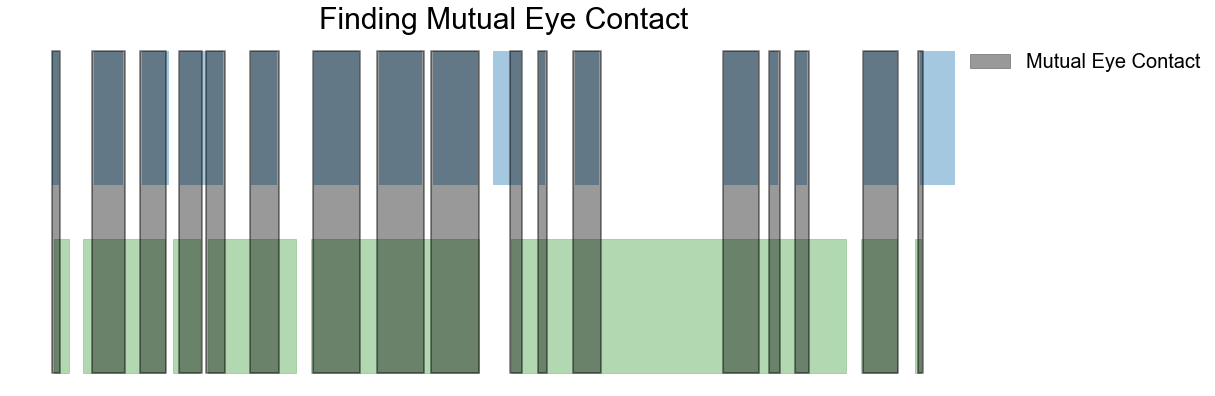

In [8]:
fig,ax=plt.subplots(figsize=(15,6),sharex=True)
sns.despine(left=True, bottom=True)
sns.set_context('paper')
plt.tight_layout(pad=3)
font = {'fontname':'Arial'}

ax.broken_barh(ec1ranges,(0.1,0.5),alpha=0.4)
ax.broken_barh(ec2ranges,(-0.6,0.5),color='green',alpha=0.3)
ax.broken_barh(ec_both_ranges,(-0.6,1.2),facecolor='black',alpha=0.4,edgecolor='black',linewidth=2)

rect = Rectangle((0,0),1,1,color='black',alpha=0.4)
line = Line2D([],[],color='black',linewidth=2)
ax.legend(([rect]),(['Mutual Eye Contact']),
            prop={'family':'Arial', 'size':20},frameon=False,
             loc=0,bbox_to_anchor=(0.72, 0.5, 0.5, 0.5))

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Finding Mutual Eye Contact',**font,size=30)